<font size="6">B. K-Means on Boston Housing Dataset</font>

In [18]:
#1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#2. Importing the dataset
dataset = pd.read_excel('boston housing.xls')
print("head---");
print(dataset.head())
print("describe---");
print(dataset.describe())
print("info---");
print(dataset.info())

#X = dataset.drop('MV', axis='columns')
#y = dataset['MV']
#X = dataset.iloc[:,:-1].values;
#y = dataset.iloc[:, -1].values;
X = dataset.iloc[:,[5,12]].values;   #rm, lstat
print("X---");
print(X);
#print("y---");
#print(y);

head---
      CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

          PT           B  LSTAT         MV  
0  15.300000  396.899994   4.98  24.000000  
1  17.799999  396.899994   9.14  21.600000  
2  17.799999  392.829987   4.03  34.700001  
3  18.700001  394.630005   2.94  33.400002  
4  18.700001  396.899994   5.33  36.200001  
describe---
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8

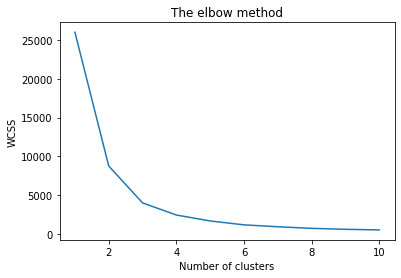

In [27]:
# 3. Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):      #considering 10 number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42);  #to avoid Random Initialisation Trap - k-means++
    kmeans.fit(X);
    wcss.append(kmeans.inertia_);      #appending wcss value into wcss list
plt.plot(range(1,11), wcss);     #x, y
plt.title('The elbow method');
plt.xlabel('Number of clusters');
plt.ylabel('WCSS');
plt.show();

In [30]:
#4. Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42);  # number of cluster value from above is 3
y_kmeans = kmeans.fit_predict(X);
print('cluster array indices on dataset');
print(y_kmeans);     # index starts from 

range_n_clusters = [2, 3, 4, 5]

cluster array indices on dataset
[3 0 3 3 3 3 0 2 1 2 2 0 2 3 0 0 3 2 0 0 2 0 2 2 2 2 2 2 0 0 1 0 1 2 2 0 0
 0 0 3 3 3 3 3 0 0 0 2 1 2 0 0 3 0 2 3 3 3 3 0 0 2 3 0 3 3 0 3 0 0 3 0 3 3
 3 0 0 0 0 0 3 3 3 3 0 3 0 0 3 3 0 3 3 3 0 3 0 3 3 3 0 3 0 0 0 2 2 0 0 2 0
 0 2 2 0 2 0 0 2 0 2 0 2 1 2 2 1 2 2 2 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1
 1 2 0 0 0 2 2 2 2 3 3 3 3 3 3 3 0 0 3 0 0 0 2 0 2 0 0 3 0 3 3 3 3 0 3 3 0
 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 0 2 2 1 2 1 2 0 1 0 0 0 2 0 0 2
 0 3 3 3 3 3 3 3 0 3 3 3 3 0 0 3 3 3 0 0 0 3 0 2 0 0 0 3 3 3 3 3 3 0 3 3 3
 3 0 3 3 0 3 0 2 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 0 0 3
 3 2 3 3 3 0 0 3 3 0 3 3 3 0 0 3 0 3 0 0 2 2 0 0 3 3 3 0 3 3 3 0 0 3 0 0 3
 3 3 3 0 0 0 0 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 2 0 0 0 3 0 0 2 3 3 0 0 3 3
 3 0 0 1 1 0 1 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 1 1 1 2 2 2 1 1 1
 0 1 2 0 2 1 2 1 1 1 1 2 1 2 2 0 1 2 1 2 2 2 1 2 2 0 2 2 1 2 1 1 1 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 2 0 2 1 2 

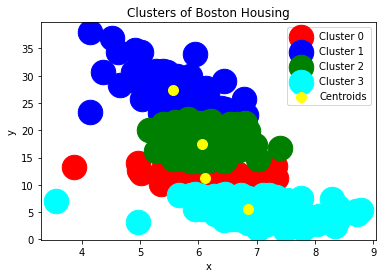

In [31]:
#5. Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 600, c = 'red', label = 'Cluster 0');  #rm, lstat
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 600, c = 'blue', label = 'Cluster 1');  #rm, lstat
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 600, c = 'green', label = 'Cluster 2');  #rm, lstat
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 600, c = 'cyan', label = 'Cluster 3');   #rm, lstat
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids');  #x, y
plt.title('Clusters of Boston Housing');
plt.xlabel('x');
plt.ylabel('y');
plt.legend()
plt.show();

For n_clusters = 2 The average silhouette_score is : 0.5869220969204682
For n_clusters = 3 The average silhouette_score is : 0.577029714577025
For n_clusters = 4 The average silhouette_score is : 0.5353194068736417
For n_clusters = 5 The average silhouette_score is : 0.5174412650059967


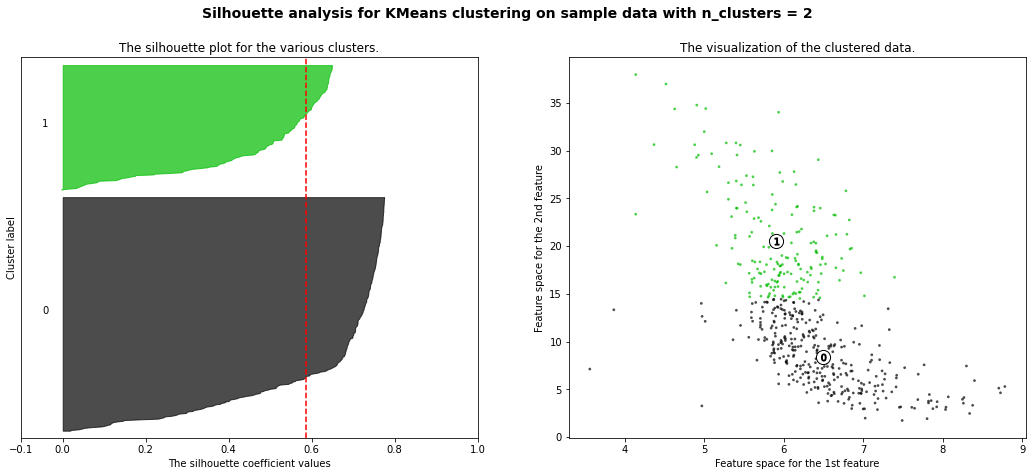

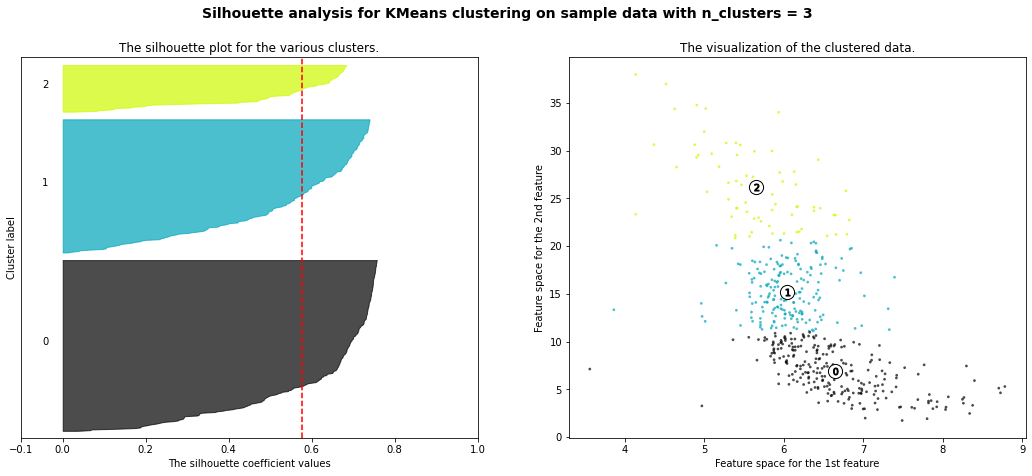

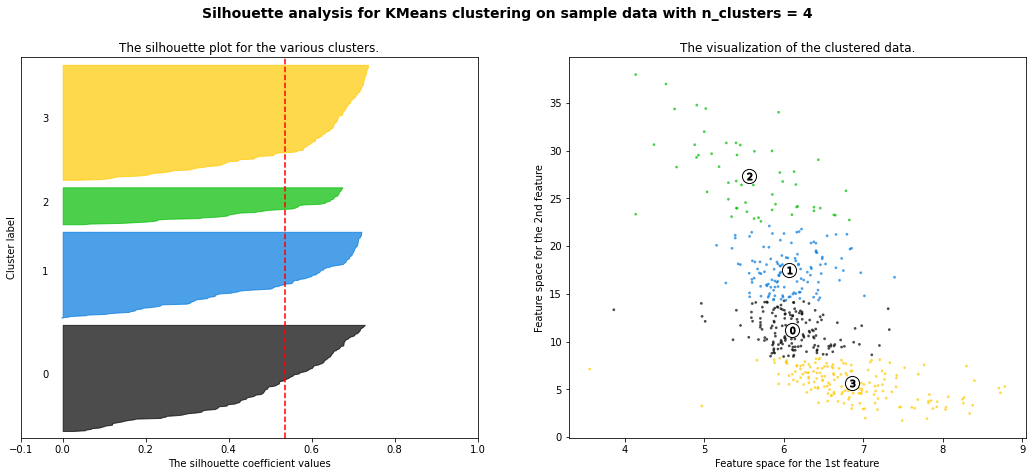

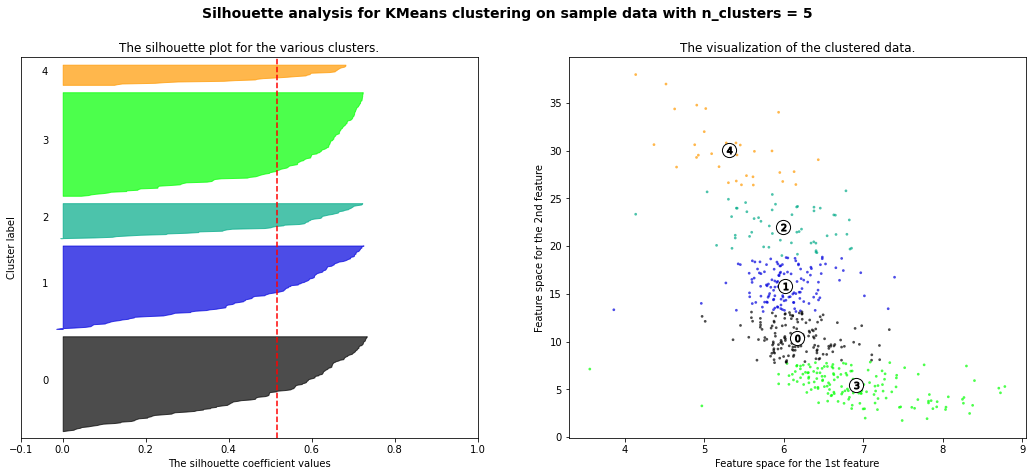

In [32]:
#6. Silhouette Coefficients 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<font size="6">A. Gaussian Mixture Model (GMM) on Boston Housing Dataset</font>

In [33]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #z-score variables
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [34]:
df = pd.read_excel('boston housing.xls')
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

          PT           B  LSTAT         MV  
0  15.300000  396.899994   4.98  24.000000  
1  17.799999  396.899994   9.14  21.600000  
2  17.799999  392.829987   4.03  34.700001  
3  18.700001  394.630005   2.94  33.400002  
4  18.700001  396.899994   5.33  36.200001  


In [37]:
# when considering only RM and LSTAT as independent variables
features = ['RM', 'LSTAT']
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 3)      # 3 cluster
EM.fit(X)
cluster = EM.predict(X)
print(cluster)

#cluster_p = EM.predict_proba(X)
#print(cluster_p)

[0 2 0 0 0 0 2 2 1 2 1 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2
 0 2 0 0 0 0 0 2 2 2 2 1 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 0 2 2 0 2 0 2
 0 2 2 2 2 2 0 0 0 2 2 0 2 2 0 0 2 2 2 0 2 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 2 1
 1 2 2 2 0 2 2 2 2 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 0 1
 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 1 2 2 0 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 1 0 0 1 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 2 0
 0 2 0 0 0 2 2 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 2 2 0 2 2 0
 0 0 2 2 2 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 0 2 0 0 0 0 0 0
 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1
 2 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 2 1
 1 1 2 2 2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 2 2
 0 0 2 2 2 2 2 2 1 1 2 2 

Silhouette:  0.33137338834033414


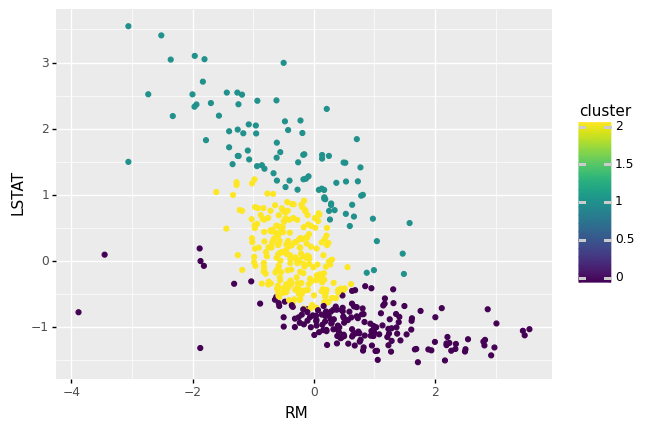


2    240
0    176
1     90
Name: cluster, dtype: int64


In [38]:
print('Silhouette: ', silhouette_score(X, cluster))

X['cluster'] = cluster
print(ggplot(X, aes(x = 'RM', y = 'LSTAT', color = 'cluster')) + geom_point())
print(X['cluster'] .value_counts())

In [40]:
# when considering most independent variables
features = ['RM', 'LSTAT','INDUS','NOX','TAX','PT']
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 3)      # 3 cluster
EM.fit(X)
cluster = EM.predict(X)
print(cluster)

#cluster_p = EM.predict_proba(X)
#print(cluster_p)

[1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 2 1 2 2 2 2 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 2 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Silhouette:  0.22053176650541653


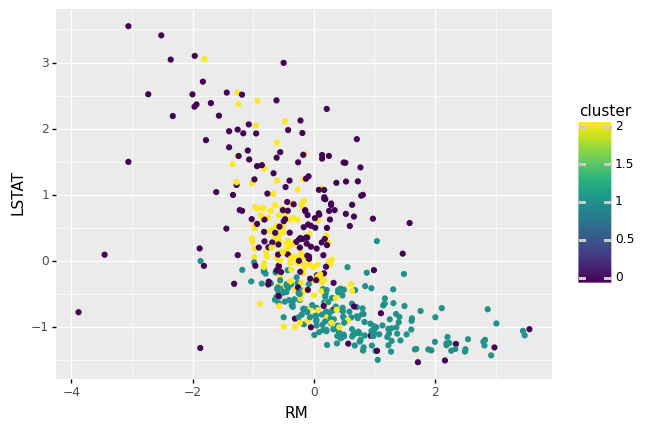


1    194
0    167
2    145
Name: cluster, dtype: int64


In [41]:
print('Silhouette: ', silhouette_score(X, cluster))

X['cluster'] = cluster
print(ggplot(X, aes(x = 'RM', y = 'LSTAT', color = 'cluster')) + geom_point())
print(X['cluster'] .value_counts())

Silhouette:  0.6512768059284046


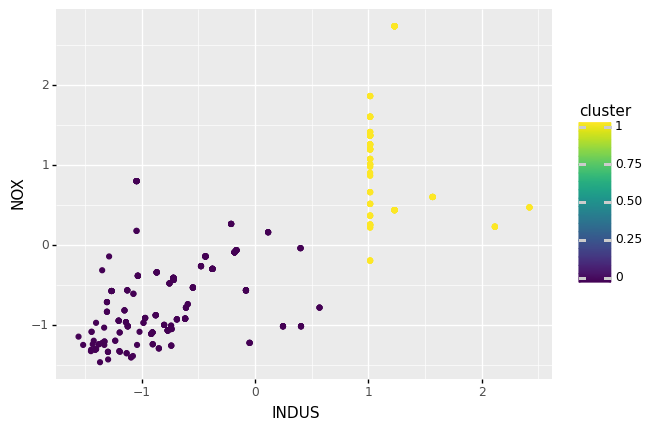


0    317
1    189
Name: cluster, dtype: int64


In [17]:
features = ['INDUS','NOX']
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 2)      # 3 cluster
EM.fit(X)
cluster = EM.predict(X)
#print(cluster)

#cluster_p = EM.predict_proba(X)
#print(cluster_p)
print('Silhouette: ', silhouette_score(X, cluster))

X['cluster'] = cluster
print(ggplot(X, aes(x = 'INDUS', y = 'NOX', color = 'cluster')) + geom_point())
print(X['cluster'] .value_counts())